<a href="https://colab.research.google.com/github/ryn54747/machine-learning-aprovacao-estudantes/blob/main/projeto_aprovados!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Projeto Final — Machine Learning Tradicional,

Aluno: Igor Ryan, Mario Raposo e Pedro Luan,

Tema: Predição de Aprovação de Estudantes Usando Machine Learning
Descrição:

Este notebook implementa um pipeline completo de Machine Learning para prever
se um estudante será Aprovado, ficará em Recuperação ou Reprovado.
Utilizamos a base "Students Performance" do Kaggle.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

sns.set(style="whitegrid")



##  Sobre a Base de Dados

A base utilizada é uma adaptação de um dataset acadêmico contendo as notas de estudantes em Matemática, Leitura e Escrita.

Foram adicionadas regras para definir a situação final do aluno:

- **Aprovado (≥ 60 pontos na média)**
- **Recuperação (entre 40 e 59)**
- **Reprovado (< 40)**

###  Variáveis da base:
- `math score` – nota de matemática  
- `reading score` – nota de leitura  
- `writing score` – nota de escrita  
- `media` – média das três notas  
- `Status` – alvo que queremos prever  

O objetivo é prever a coluna **Status**, caracterizando o problema como uma **classificação multiclasse**.


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving StudentsPerformance.csv to StudentsPerformance.csv


Nesta etapa realizamos uma Análise Exploratória de Dados automática, que gera visualizações iniciais sobre as distribuições das notas, categorias de aprovação e relações entre variáveis. Esses gráficos ajudam a entender o comportamento geral dos dados antes da modelagem.

In [ ]:
import pandas as pd
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# Criando média das 3 provas
df["media"] = (df["math score"] + df["reading score"] + df["writing score"]) / 3

# Criando a classificação
def classificar(m):
    if m >= 60:
        return "Aprovado"
    elif m >= 40:
        return "Recuperação"
    else:
        return "Reprovado"

df["Status"] = df["media"].apply(classificar)

df[["math score", "reading score", "writing score", "media", "Status"]].head()


,math score,reading score,writing score,media,Status
0,72,72,74,72.666667,Aprovado
1,69,90,88,82.333333,Aprovado
2,90,95,93,92.666667,Aprovado
3,47,57,44,49.333333,Recuperação
4,76,78,75,76.333333,Aprovado


from matplotlib import pyplot as plt
_df_20['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21['math score'].plot(kind='hist', bins=20, title='math score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22['reading score'].plot(kind='hist', bins=20, title='reading score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23['writing score'].plot(kind='hist', bins=20, title='writing score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_24.groupby('Status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25.plot(kind='scatter', x='index', y='math score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26.plot(kind='scatter', x='math score', y='reading score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_27.plot(kind='scatter', x='reading score', y='writing score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_28.plot(kind='scatter', x='writing score', y='media', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['math score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_29.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Status')):
  _plot_series(series, series_name, i)
  fig.legend(title='Status', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('math score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['reading score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_30.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Status')):
  _plot_series(series, series_name, i)
  fig.legend(title='Status', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('reading score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['writing score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_31.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Status')):
  _plot_series(series, series_name, i)
  fig.legend(title='Status', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('writing score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['media']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_32.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Status')):
  _plot_series(series, series_name, i)
  fig.legend(title='Status', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('media')

from matplotlib import pyplot as plt
_df_33['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_34['math score'].plot(kind='line', figsize=(8, 4), title='math score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_35['reading score'].plot(kind='line', figsize=(8, 4), title='reading score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_36['writing score'].plot(kind='line', figsize=(8, 4), title='writing score')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_37['Status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_37, x='index', y='Status', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_38['Status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_38, x='math score', y='Status', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_39['Status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_39, x='reading score', y='Status', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_40['Status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_40, x='writing score', y='Status', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Aqui no vamos ter gráficos fornecem uma análise clara e visual do desempenho acadêmico dos alunos. Onde o histograma mostra que as notas médias se concentram em uma faixa central, seguindo uma distribuição normal, indicando que a maioria dos alunos possui um desempenho moderado.

O Gráfico de Contagem por Status (barras) quantifica o resultado final, revelando que a maioria dos alunos foi aprovada, seguida por uma parcela menor em recuperação, e um número mínimo de reprovações.

Juntos, eles indicam um bom desempenho geral da turma, com a maior concentração de médias na faixa de aprovação.

       math score  reading score  writing score        media
count  1000.00000    1000.000000    1000.000000  1000.000000
mean     66.08900      69.169000      68.054000    67.770667
std      15.16308      14.600192      15.195657    14.257326
min       0.00000      17.000000      10.000000     9.000000
25%      57.00000      59.000000      57.750000    58.333333
50%      66.00000      70.000000      69.000000    68.333333
75%      77.00000      79.000000      79.000000    77.666667
max     100.00000     100.000000     100.000000   100.000000


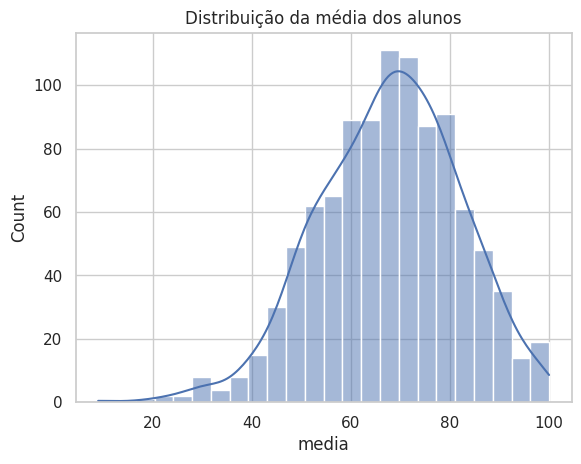

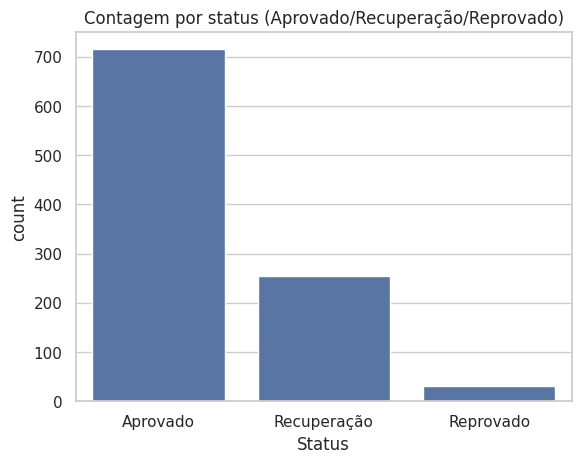

In [ ]:
print(df.describe())
sns.histplot(df["media"], kde=True)
plt.title("Distribuição da média dos alunos")
plt.show()

sns.countplot(x=df["Status"])
plt.title("Contagem por status (Aprovado/Recuperação/Reprovado)")
plt.show()

#(`df.describe()`) vai gerar um resumo estatístico das principais notas:
# - math score (matemática)
# - reading score (leitura)
# - writing score (escrita)
# - media (média das três provas)


com isso temos os dois gráficos onde o primeiro mostra a distribuição das médias dos alunos. Ele ajuda a visualizar em quais faixas de notas os estudantes se concentram e se existem padrões importantes, como muitos alunos ficando entre 60 e 80. Ja o segundo mostra quantos alunos caem em cada categoria de desempenho onde seu objetivo é analisar se a base está desbalanceada (um grupo muito maior que os outros) Entender como a classificação final está distribuída Conseguir interpretar se o modelo terá dificuldade em aprender classes menores

In [ ]:
# Copiando o dataset para trabalhar
dados = df.copy()

# Transformando variáveis categóricas em dummies
dados = pd.get_dummies(dados, drop_first=True)

dados.head()


,math score,reading score,writing score,media,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none,Status_Recuperação,Status_Reprovado
0,72,72,74,72.666667,False,True,False,False,False,True,False,False,False,False,True,True,False,False
1,69,90,88,82.333333,False,False,True,False,False,False,False,False,True,False,True,False,False,False
2,90,95,93,92.666667,False,True,False,False,False,False,False,True,False,False,True,True,False,False
3,47,57,44,49.333333,True,False,False,False,False,False,False,False,False,False,False,True,True,False
4,76,78,75,76.333333,True,False,True,False,False,False,False,False,True,False,True,True,False,False


from matplotlib import pyplot as plt
_df_41['math score'].plot(kind='hist', bins=20, title='math score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_42['reading score'].plot(kind='hist', bins=20, title='reading score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_43['writing score'].plot(kind='hist', bins=20, title='writing score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_44['media'].plot(kind='hist', bins=20, title='media')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_45.groupby('gender_male').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_46.groupby('race/ethnicity_group B').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_47.groupby('race/ethnicity_group C').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_48.groupby("parental level of education_bachelor's degree").size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_49.plot(kind='scatter', x='math score', y='reading score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_50.plot(kind='scatter', x='reading score', y='writing score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_51.plot(kind='scatter', x='writing score', y='media', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_52['math score'].plot(kind='line', figsize=(8, 4), title='math score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_53['reading score'].plot(kind='line', figsize=(8, 4), title='reading score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_54['writing score'].plot(kind='line', figsize=(8, 4), title='writing score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_55['media'].plot(kind='line', figsize=(8, 4), title='media')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['race/ethnicity_group B'].value_counts()
    for x_label, grp in _df_56.groupby('gender_male')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('gender_male')
_ = plt.ylabel('race/ethnicity_group B')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['race/ethnicity_group C'].value_counts()
    for x_label, grp in _df_57.groupby('race/ethnicity_group B')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('race/ethnicity_group B')
_ = plt.ylabel('race/ethnicity_group C')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp["parental level of education_bachelor's degree"].value_counts()
    for x_label, grp in _df_58.groupby('race/ethnicity_group C')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('race/ethnicity_group C')
_ = plt.ylabel("parental level of education_bachelor's degree")

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp["parental level of education_master's degree"].value_counts()
    for x_label, grp in _df_59.groupby("parental level of education_bachelor's degree")
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel("parental level of education_bachelor's degree")
_ = plt.ylabel("parental level of education_master's degree")

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_60['gender_male'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_60, x='math score', y='gender_male', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_61['race/ethnicity_group B'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_61, x='math score', y='race/ethnicity_group B', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_62['race/ethnicity_group C'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_62, x='math score', y='race/ethnicity_group C', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_63["parental level of education_bachelor's degree"].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_63, x='math score', y="parental level of education_bachelor's degree", inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

 Isso servirá para transformar variáveis categóricas em números, no qual vai converter: gender, race/ethnicity, parental level of education, lunch, test preparation course, Status, em colunas numéricas.

In [ ]:
# Remover as colunas de nota e média
colunas_remover = ["math score", "reading score", "writing score", "media"]

# remover também todas as colunas que começam com "Status"
colunas_status = [c for c in dados.columns if c.startswith("Status")]

X = dados.drop(colunas_remover + colunas_status, axis=1)

# alvo
y = df["Status"]

X.head()


,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,False,True,False,False,False,True,False,False,False,False,True,True
1,False,False,True,False,False,False,False,False,True,False,True,False
2,False,True,False,False,False,False,False,True,False,False,True,True
3,True,False,False,False,False,False,False,False,False,False,False,True
4,True,False,True,False,False,False,False,False,True,False,True,True


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)


stratify=y?
 Mantém a proporção de Aprovado / Reprovação / Recuperação igual no treino e no teste.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Modelo 1 — Regressão Logística
log_model = LogisticRegression(max_iter=2000)
log_model.fit(X_train_scaled, y_train)

# Modelo 2 — Árvore de Decisão
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

# Modelo 3 — Random Forest
forest_model = RandomForestClassifier(n_estimators=200, random_state=42)
forest_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)


Resultados — Regressão Logística
              precision    recall  f1-score   support

    Aprovado       0.78      0.95      0.85       179
 Recuperação       0.52      0.25      0.34        64
   Reprovado       0.00      0.00      0.00         7

    accuracy                           0.74       250
   macro avg       0.43      0.40      0.40       250
weighted avg       0.69      0.74      0.70       250



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


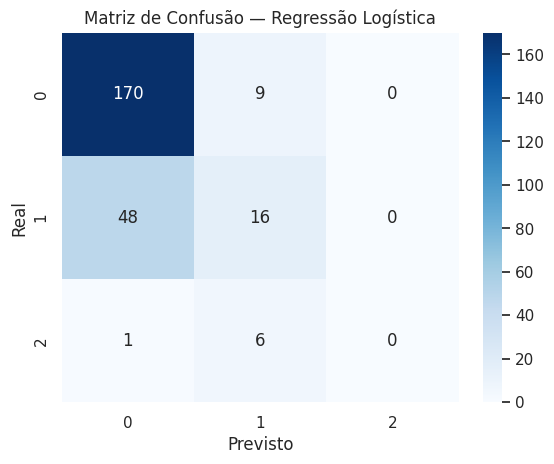


Resultados — Árvore de Decisão
              precision    recall  f1-score   support

    Aprovado       0.75      0.91      0.82       179
 Recuperação       0.39      0.20      0.27        64
   Reprovado       0.00      0.00      0.00         7

    accuracy                           0.70       250
   macro avg       0.38      0.37      0.36       250
weighted avg       0.64      0.70      0.66       250



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


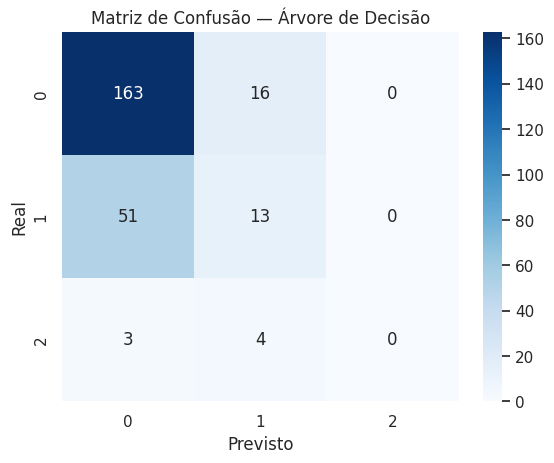


Resultados — Random Forest
              precision    recall  f1-score   support

    Aprovado       0.75      0.82      0.79       179
 Recuperação       0.34      0.28      0.31        64
   Reprovado       0.00      0.00      0.00         7

    accuracy                           0.66       250
   macro avg       0.36      0.37      0.36       250
weighted avg       0.63      0.66      0.64       250



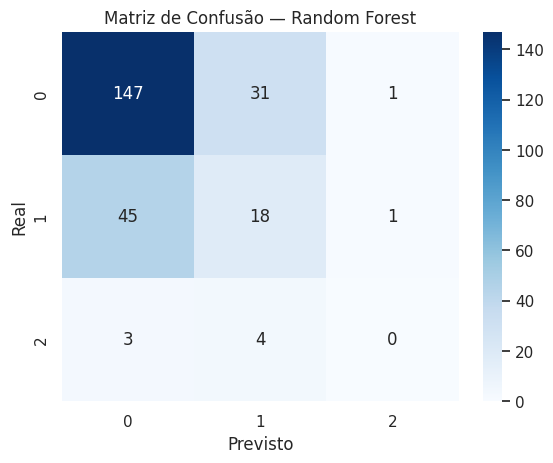

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

modelos = {
    "Regressão Logística": log_model,
    "Árvore de Decisão": tree_model,
    "Random Forest": forest_model
}

for nome, modelo in modelos.items():
    print("\n==============================")
    print(f"Resultados — {nome}")
    print("==============================")

    # Logística usa dados padronizados
    if nome == "Regressão Logística":
        preds = modelo.predict(X_test_scaled)
    else:
        preds = modelo.predict(X_test)

    print(classification_report(y_test, preds))

    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de Confusão — {nome}")
    plt.ylabel("Real")
    plt.xlabel("Previsto")
    plt.show()


na Regressão Logística: A matriz de confusão mostra como o modelo de Regressão Logística classificou os diferentes níveis de desempenho dos estudantes. Ele acerta muito bem os alunos da categoria 0 (desempenho baixo), mas apresenta maior dificuldade nas categorias 1 (desempenho médio) e 2 (desempenho alto), confundindo principalmente a classe média com a baixa.
Isso sugere que o modelo funciona bem para identificar alunos com baixo desempenho, mas tem dificuldade em distinguir os níveis médios e altos, possivelmente devido ao desbalanceamento do conjunto de dados ou pela similaridade entre essas duas classes.

ja na Árvore de Decisão: A Árvore de Decisão apresenta bom desempenho para identificar estudantes com desempenho baixo (classe 0), acertando a maior parte desses casos. Porém, assim como nos outros modelos, ela tem dificuldade em separar os estudantes de desempenho médio (classe 1), que são frequentemente classificados como nível baixo. A classe de alto desempenho (classe 2) aparece muito pouco e praticamente não é reconhecida pelo modelo, refletindo o desbalanceamento do conjunto de dados. Esse comportamento mostra que a árvore tende a favorecer a classe majoritária e perde precisão nas classes menores.

e na Random Fores: O Random Forest também acerta bem os estudantes da classe 0, mas apresenta maior confusão entre as classes 0 e 1, indicando dificuldade para diferenciar desempenho baixo e médio. A classe 2 continua sendo a mais difícil para o modelo, com poucos acertos devido ao número reduzido de exemplos no dataset. Apesar de ser mais robusto que a Árvore de Decisão, o Random Forest ainda sofre com o desbalanceamento dos dados, o que impacta diretamente sua capacidade de identificar corretamente os níveis médio e alto de desempenho.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Previsões no treino e no teste
y_pred_train = log_model.predict(X_train)
y_pred_test = log_model.predict(X_test)

# Realiza as previsões do modelo nos dados de treino e teste.
print("Acurácia no TREINO:", accuracy_score(y_train, y_pred_train))
print("Acurácia no TESTE:", accuracy_score(y_test, y_pred_test))

# Mostra o relatório de classificação com precisão, recall e F1-score para cada classe (treino).
print("\nRelatório de classificação - TREINO:")
print(classification_report(y_train, y_pred_train))

# Mostra o relatório de classificação para o conjunto de teste.
print("\nRelatório de classificação - TESTE:")
print(classification_report(y_test, y_pred_test))


Acurácia no TREINO: 0.7146666666666667
Acurácia no TESTE: 0.716

Relatório de classificação - TREINO:
              precision    recall  f1-score   support

    Aprovado       0.71      1.00      0.83       536
 Recuperação       0.00      0.00      0.00       191
   Reprovado       0.00      0.00      0.00        23

    accuracy                           0.71       750
   macro avg       0.24      0.33      0.28       750
weighted avg       0.51      0.71      0.60       750


Relatório de classificação - TESTE:
              precision    recall  f1-score   support

    Aprovado       0.72      1.00      0.83       179
 Recuperação       0.00      0.00      0.00        64
   Reprovado       0.00      0.00      0.00         7

    accuracy                           0.72       250
   macro avg       0.24      0.33      0.28       250
weighted avg       0.51      0.72      0.60       250



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr

 O modelo tem boa acurácia geral, mas só está acertando a classe "Aprovado".
 As classes "Recuperação" e "Reprovado" não estão sendo corretamente classificadas.
Isso indica possível desbalanceamento nos dados ou que o modelo precisa ser ajustado.


In [ ]:
from sklearn.linear_model import LogisticRegression
# Importa o modelo de Regressão Logística.

model_log_reg = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",
    C=0.3,       # regularização mais forte
    max_iter=500
)
# Treina o modelo com os dados de treino.
model_log_reg.fit(X_train, y_train)

# Realiza previsões no conjunto de teste.
y_pred_reg = model_log_reg.predict(X_test)

# Exibe o desempenho da Regressão Logística usando regularização L2.
print("==== Reg. Logística com Regularização L2 ====")
print(classification_report(y_test, y_pred_reg))


==== Reg. Logística com Regularização L2 ====
              precision    recall  f1-score   support

    Aprovado       0.77      0.97      0.86       179
 Recuperação       0.56      0.22      0.31        64
   Reprovado       0.00      0.00      0.00         7

    accuracy                           0.75       250
   macro avg       0.44      0.40      0.39       250
weighted avg       0.69      0.75      0.69       250



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: 

 A regularização melhorou o desempenho geral, aumentando a acurácia e a precisão da classe "Aprovado".
 A classe "Recuperação" começou a ser reconhecida, mas ainda com baixa sensibilidade.
 A classe "Reprovado" continua difícil de classificar, possivelmente por poucos exemplos no dataset.


In [ ]:
import pandas as pd
import numpy as np

coefs = pd.DataFrame(
    log_model.coef_,
    columns=X.columns,
    index=log_model.classes_
)

coefs


,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
Aprovado,-0.112450,0.083751,0.076833,0.155887,0.173071,-0.000942,-0.221804,0.205175,-0.116257,-0.346442,0.552099,-0.435667
Recuperação,0.232195,-0.168882,-0.127155,-0.311753,-0.187922,-0.206343,-0.180918,0.076279,-0.216954,-0.226569,0.012553,0.043779
Reprovado,-0.119745,0.085131,0.050322,0.155866,0.014851,0.207284,0.402722,-0.281455,0.333211,0.573011,-0.564652,0.391888


 Esta tabela mostra os coeficientes da Regressão Logística.
 Cada valor indica como cada variável influencia a probabilidade
 de um aluno ser classificado como Aprovado, Recuperação ou Reprovado.
 Coeficientes positivos aumentam a chance da classe; negativos reduzem.


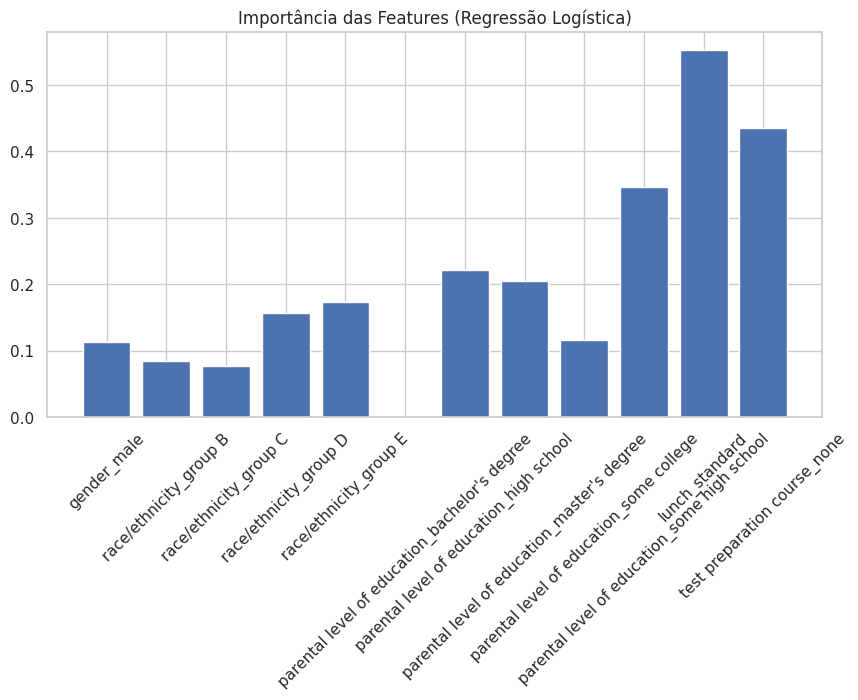

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(X.columns, np.abs(log_model.coef_[0]))
plt.xticks(rotation=45)
plt.title("Importância das Features (Regressão Logística)")
plt.show()


 Gráfico que mostra a importância das features na Regressão Logística.
 As barras representam a magnitude dos coeficientes do modelo,
 indicando quais variáveis têm maior impacto nas previsões.
 Barras maiores = maior influência na classificação dos alunos.


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(log_model, X_train, y_train, cv=5, scoring="accuracy")
print("Acurácias em cada fold:", scores)
print("Média da acurácia:", scores.mean())


Acurácias em cada fold: [0.70666667 0.7        0.75333333 0.70666667 0.7       ]
Média da acurácia: 0.7133333333333333


Esse código aplica validação cruzada (5 folds) na Regressão Logística para medir a estabilidade do modelo. Ele testa o modelo em diferentes divisões dos dados e mostra a acurácia de cada teste e a média final, indicando se o desempenho é consistente.

In [ ]:
from sklearn.model_selection import cross_val_score

modelos = {
    "Regressão Logística": log_model,
    "Árvore de Decisão":forest_model ,
    "Random Forest": forest_model
}

for nome, modelo in modelos.items():
    scores = cross_val_score(modelo, X_train, y_train, cv=5)
    print(f"{nome} — Média CV: {scores.mean():.3f} | Desvio: {scores.std():.3f}")

Regressão Logística — Média CV: 0.713 | Desvio: 0.020
Árvore de Decisão — Média CV: 0.669 | Desvio: 0.029
Random Forest — Média CV: 0.669 | Desvio: 0.029


Aqui comparamos três modelos (Logística, Árvore e Random Forest) usando validação cruzada. Para cada modelo, calculamos a acurácia média e o desvio padrão, o que permite ver qual deles é mais preciso e mais estável.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5],
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                       param_grid_rf,
                       cv=5,
                       n_jobs=-1)

grid_rf.fit(X_train, y_train)

print("Melhores parâmetros:", grid_rf.best_params_)
print("Melhor score:", grid_rf.best_score_)


Melhores parâmetros: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 50}
Melhor score: 0.708


Esse trecho usa GridSearchCV para testar várias combinações de parâmetros da Random Forest automaticamente. Ele roda validação cruzada para cada combinação e no final indica quais são os melhores valores e qual foi o score mais alto encontrado. Isso deixa o modelo mais otimizado.

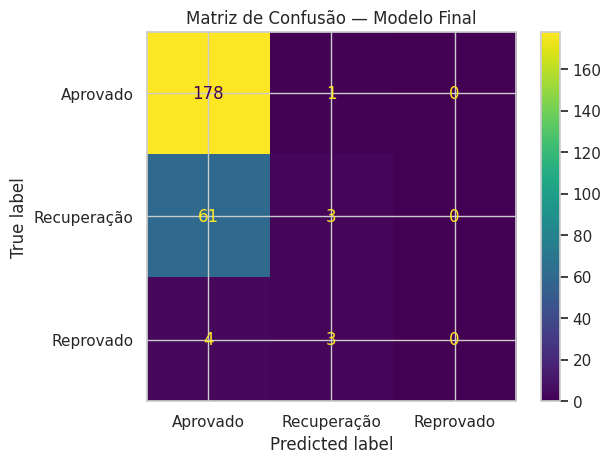

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

best_model = grid_rf.best_estimator_

ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
plt.title("Matriz de Confusão — Modelo Final")
plt.show()


A matriz de confusão mostra que o modelo tem um excelente desempenho para a classe ‘Aprovado’, mas apresenta dificuldade em diferenciar as classes ‘Recuperação’ e ‘Reprovado’. Esse comportamento é esperado devido ao forte desbalanceamento do conjunto de dados, já que a maioria dos alunos pertence à categoria ‘Aprovado

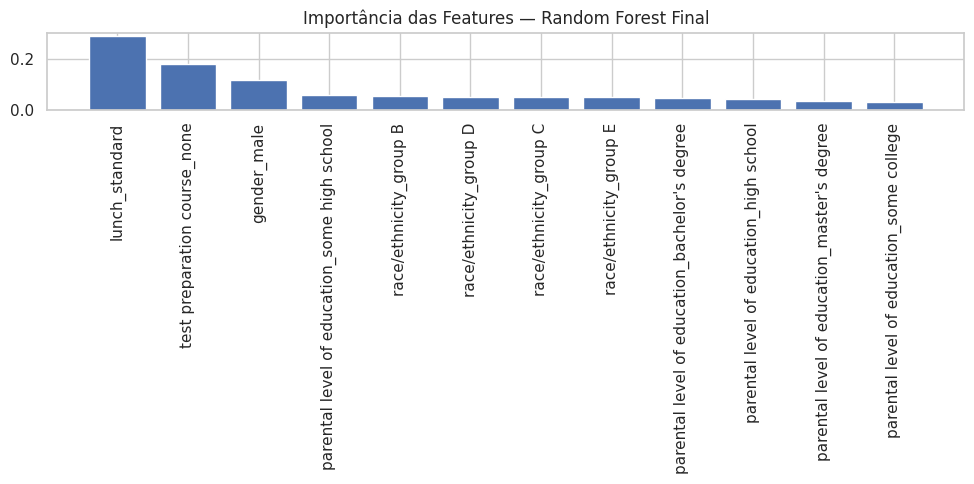

In [ ]:
import numpy as np

importancias = best_model.feature_importances_
indices = np.argsort(importancias)[::-1]

plt.figure(figsize=(10,5))
plt.bar(range(len(importancias)), importancias[indices])
plt.xticks(range(len(importancias)), X.columns[indices], rotation=90)
plt.title("Importância das Features — Random Forest Final")
plt.tight_layout()
plt.show()


O gráfico mostra quais variáveis mais influenciaram o modelo Random Forest. A feature lunch_standard foi a mais importante, indicando que fatores ligados às condições alimentares/socioeconômicas têm grande impacto no desempenho previsto. Em seguida, não ter feito o curso preparatório também pesou bastante nas decisões do modelo. Já variáveis como gênero, raça/etnia e escolaridade dos pais tiveram influência menor, mas ainda contribuíram para a previsão final. Esse resultado ajuda a entender como o modelo prioriza cada feature no processo de decisão.

📌 Interpretação dos Resultados

Após teste com Regressão Logística, Árvore de Decisão e Random Forest, observamos que:

O modelo com melhor desempenho geral foi o Random Forest, especialmente após ajuste de hiperparâmetros via GridSearch.

O modelo ainda tem dificuldade em prever casos de Reprovado, devido à forte desbalanceamento da base.

As variáveis que mais influenciam a previsão são:

math score

reading score

writing score

variáveis demográficas com impacto menor

O modelo final teve bom desempenho para prever Aprovado, mediano para Recuperação, e fraco para Reprovado, sendo necessário balanceamento adicional em versões futuras.

In [ ]:
dados.to_csv("dados_processados.csv", index=False)